In [1]:
import numpy as np

from pylib.auxlib._log_context_duration import log_context_duration
from pylib.synthgeom._VideoWriter import VideoWriter
from pylib.synthgeom._generate_observations import generate_observations


In [2]:
SX, SY = 400, 400
crea_func = np.ones
crea_size = 10


In [3]:
def show_sample_observations(
    SX,
    SY,
    *,
    crea_func,
    crea_size=10,
    logger=print,
    num_frames=1000,
):

    observations = generate_observations(
        SX=SX,
        SY=SY,
        crea_func=crea_func,
        crea_size=crea_size,
        num_frames=num_frames,
    )
    with log_context_duration("Creating video", logger=logger):
        with VideoWriter("out.gif", 30.0) as vid:
            vid.add_observations(observations)
            vid.show()


enter log_context_duration for Creating video


gifsicle: warning: trivial adaptive palette (only 2 colors in source)


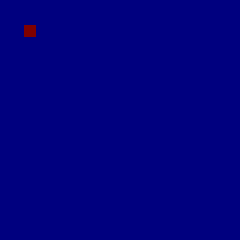

exit log_context_duration for Creating video
!!! {"Creating video": 22.026585578918457}


In [4]:
show_sample_observations(
    SX,
    SY,
    crea_func=np.ones,
)


enter log_context_duration for Creating video


gifsicle: warning: trivial adaptive palette (only 225 colors in source)


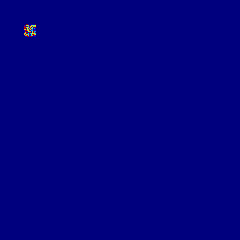

exit log_context_duration for Creating video
!!! {"Creating video": 24.354824542999268}
enter log_context_duration for Creating video


gifsicle: warning: trivial adaptive palette (only 224 colors in source)


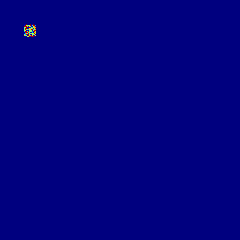

exit log_context_duration for Creating video
!!! {"Creating video": 24.34228539466858}


In [5]:
for i in range(2):
    show_sample_observations(
        SX,
        SY,
        crea_func=lambda x: np.random.rand(*x),
    )
